In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [160]:
""" Your code hear: """
df = pd.read_csv('train.csv')
df.drop(columns = ['Id'], inplace = True)

print(df.shape)

(1095, 80)


## 取出連續型特徵 (方便降維)

In [161]:
""" Your code hear: """
df = df[df.columns[(df.dtypes != 'object')]]
print(df.shape)

(1095, 37)


## 分析缺失值

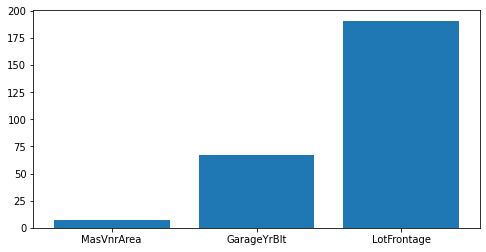

In [162]:
""" Your code hear: 練習印出缺失值圖表 """
missing = df.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace = True)

plt.figure(figsize = (8, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks()
plt.show()


## 去除缺失值

In [163]:
""" Your code hear: 去除缺失值 """
df = df.dropna()
print(df.shape)

(838, 37)


## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [164]:
""" Your code hear: """

target = 'SalePrice'
X = np.asarray(df.drop(columns = [target]))
Y = np.asarray(df[target])

# 將 Y 依照四分位距分成四類
Y = pd.qcut(Y, 4, labels = False)

# 將 X 標準化
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

print(X.shape, Y.shape)


(838, 36) (838,)


## 利用 TSNE 降維

In [166]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)

X_tsne = tsne.fit_transform(X)

## 做圖

In [167]:
""" Your code hear: """
df_tsne = pd.DataFrame()
df_tsne['X_tsne1'] = X_tsne[:, 0]
df_tsne['X_tsne2'] = X_tsne[:, 1]
df_tsne['label'] = Y
df_tsne.head()

,X_tsne1,X_tsne2,label
0,9.628448,14.175003,2
1,14.824849,11.011313,2
2,19.993898,-3.685040,2
3,-18.922915,4.351902,0
4,-4.915604,-13.678495,0


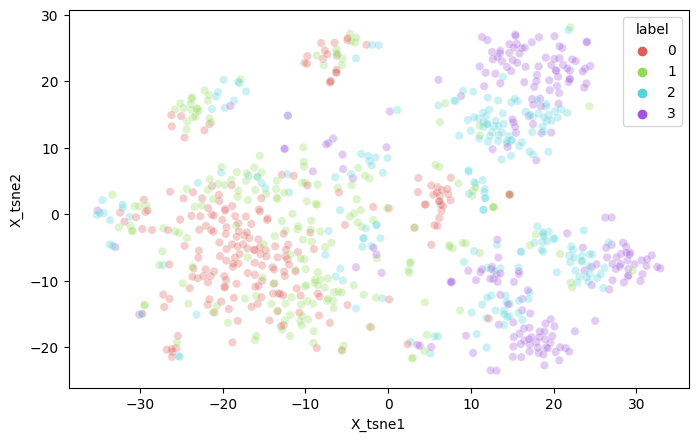

In [168]:
plt.figure(figsize = (8, 5), dpi = 100)
sns.scatterplot(
    x = 'X_tsne1', y = 'X_tsne2',
    hue = 'label', palette = sns.color_palette('hls', 4),
    data = df_tsne, legend = 'full',
    alpha = 0.3
)
plt.show()

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

0, 1兩個類別重疊性高； 2, 3 兩個類別重疊性也高，但 01 跟 23 有較明顯的差距，故之後努力方向為將 01, 23 個別切分開來

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？

目前只使用連續型的特徵，尚未使用離散特徵，且只是單純的將具缺失值的資料刪除，故可以預期降維效果不佳